### 1. Author
**Name:** Simar Malhan  
**Email:** malhan.simar24@gmail.com  
**LinkedIn:** [Simar Malhan](https://www.linkedin.com/in/simarmalhan)

### 2. Car CO2 Emissions - Analysis and Building a Random Forest Model to make predictions

#### 2.1 Data Info:
The UK government page provides tools to check fuel consumption, CO2 emissions, and vehicle tax information for new and used cars. It helps users find details like fuel economy, CO2 bands, tax bands, and related costs for different vehicles.

For more details, visit [CO2 and Vehicle Tax Tools](https://www.gov.uk/co2-and-vehicle-tax-tools).

In [69]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
# loading the dataset

df = pd.read_csv('/Users/simarmalhan/Downloads/Car Fuel and Emissions 2000-2013.csv')

/var/folders/05/073klxvx53gb5wt5h1z7h8ph0000gn/T/ipykernel_30825/1222891390.py:3: DtypeWarning: Columns (6,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/simarmalhan/Downloads/Car Fuel and Emissions 2000-2013.csv')


In [71]:
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN


### 3. Data cleaning and Prep

In [72]:
df.isnull().sum()

file                          0
year                          0
manufacturer                  0
model                         0
description                   0
euro_standard                 0
tax_band                  37674
transmission                 10
transmission_type           341
engine_capacity               7
fuel_type                     0
urban_metric                 13
extra_urban_metric           13
combined_metric               7
urban_imperial               13
extra_urban_imperial         13
combined_imperial             7
noise_level                   9
co2                           0
thc_emissions             22321
co_emissions                319
nox_emissions              5361
thc_nox_emissions         40081
particulates_emissions    30710
fuel_cost_12000_miles     12375
fuel_cost_6000_miles      33311
standard_12_months        41994
standard_6_months         42585
first_year_12_months      41994
first_year_6_months       44092
date_of_change            39297
dtype: i

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

In [74]:
# filling missing values in object type columns with median or mode

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace = True)
    else:
        df[column].fillna(df[column].median(), inplace = True)

In [75]:
# deleting the 'file' column

df.drop('file', axis = 1, inplace = True)

### 4. EDA

#### 4.1 Distribution plot of CO2 Emissions

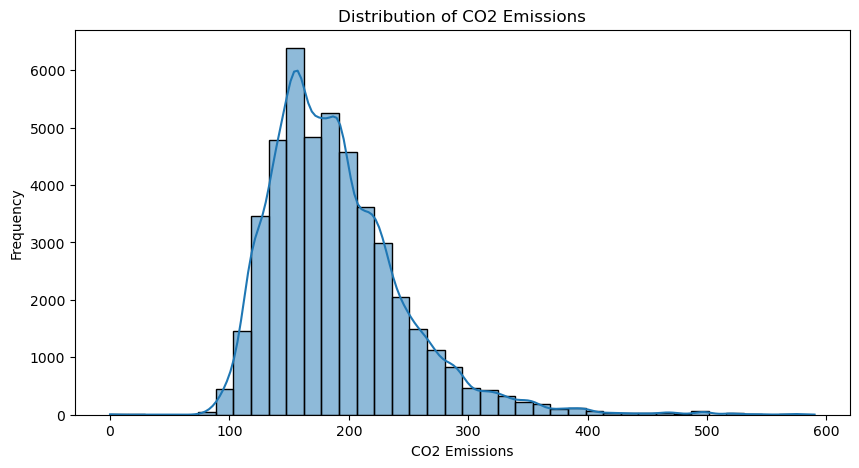

In [76]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df['co2'], bins = 40, kde = True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

#### 4.2 CO2 Emissions over the years

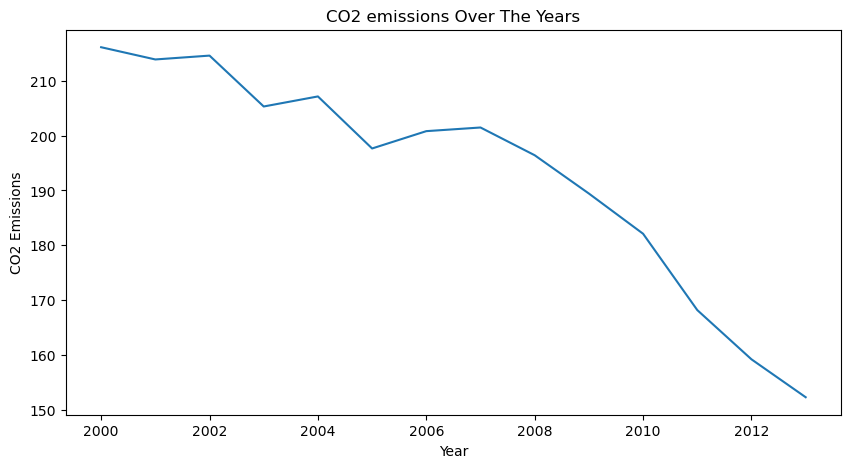

In [77]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'year', y = 'co2', errorbar = None)
plt.title('CO2 emissions Over The Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show()

#### 4.3 Average CO2 Emissions by Manufacturer

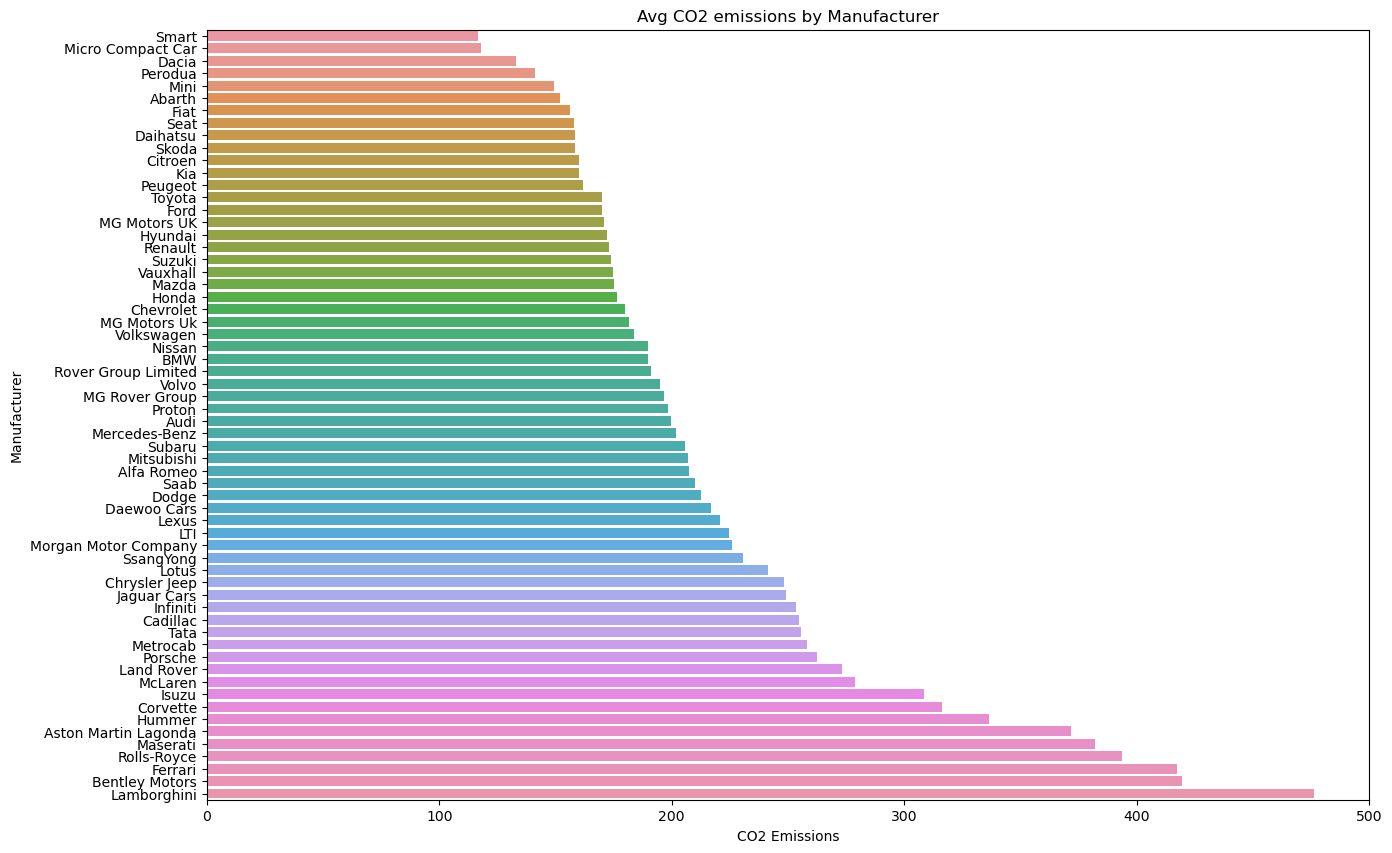

In [78]:
avgco2bymanuf = df.groupby('manufacturer')['co2'].mean().sort_values().reset_index()

plt.figure(figsize = (15, 10))
sns.barplot(data = avgco2bymanuf, x = 'co2', y = 'manufacturer')
plt.title('Avg CO2 emissions by Manufacturer')
plt.xlabel('CO2 Emissions')
plt.ylabel('Manufacturer')
plt.show()

#### 4.4 Correlation Matrix

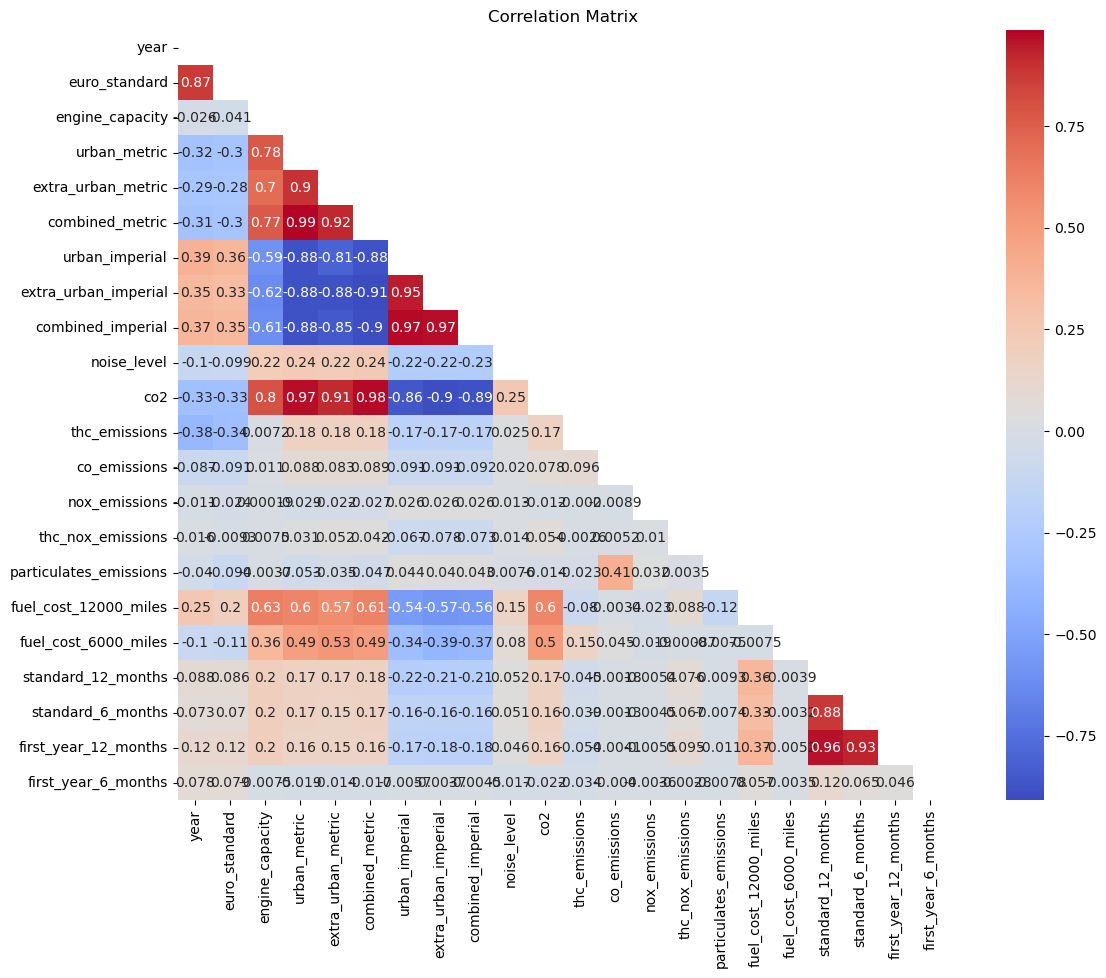

In [79]:
# Selecting only numeric columns for correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### 4.4.1 Observations

1. There's a very strong correlation between 'urban_metric' and 'co2' columns
2. There's understandably very high correlation between 'engine_capacity' and 'co2' columns as well.
3. 'fuel_cost_12000_miles' and 'engine_capacity' are also highly correlated
4. 'euro_standard' and 'co2' levels are inversely related, which makes sense because stricter emission standards (higher euro_standard) are designed to reduce the amount of carbon dioxide (co2) that vehicles release into the atmosphere.

### 5. Predicting CO2 Emissions

#### 5.1 Converting categorical columns for ML

In [80]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the new DataFrame
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Columns: 18063 entries, year to date_of_change_31 October 2003
dtypes: bool(18041), float64(19), int64(3)
memory usage: 790.7 MB
None


#### 5.2 Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
numeric_cols = df_encoded.select_dtypes(include = ['float64', 'int64']).columns

# Standardize numeric columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

#### 5.3 Training the model

In [82]:
# Features (X) and target (y)
X = df_encoded.drop(columns='co2')
y = df_encoded['co2']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 5.4 Evaluating the model

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.009368758141087369
Mean Squared Error: 0.0012530579660160394
R-squared: 0.9987668224764886


#### 5.4.2 Observations about the model evaluation

**1. Mean Absolute Error (MAE):** 0.00937 - This is very low, indicating that the model’s predictions are very close to the actual values on average.\
**2. Mean Squared Error (MSE):** 0.00125 - This is also very low, suggesting that the model has very little error in its predictions.\
**3. R-squared:** 0.99877 - This value is very close to 1, meaning the model explains almost all of the variance in the target variable.

#### 5.5 Feature Importance

In [85]:
# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)

# Print the top 10 most important features
important_features = feature_importances.nlargest(10)
print(important_features)

combined_imperial        0.739719
combined_metric          0.221091
fuel_type_Diesel         0.017888
fuel_type_LPG            0.005757
urban_metric             0.003922
fuel_type_Petrol         0.001836
fuel_cost_12000_miles    0.001734
urban_imperial           0.001618
extra_urban_imperial     0.000801
fuel_cost_6000_miles     0.000782
dtype: float64


#### 5.5.1 Feature Importance Observations

The feature importance results from the 'RandomForestRegressor' model indicate the contribution of each feature to the prediction of 'co2'. Here are the key insights:

#### High Importance Features:
- **'combined_imperial'**: Importance = 0.739719
  - This feature has the highest importance, suggesting it is the most influential metric in predicting `co2`.
- **'combined_metric'**: Importance = 0.221091
  - This feature also plays a significant role, though less so than 'combined_imperial'.